### A LARGER EXAMPLE 
 Module 02 of the course 

In [23]:
# import the required libraries
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [24]:
# read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
# for index , val in enumerate(insurance['smoker']):
#   if val == "yes":
#     insurance.smoker[index] = 1
#   else:
#     insurance.smoker[index] = 0
   

In [14]:
# for index , val in enumerate(insurance['sex']):
#   if val == "male":
#     insurance.sex[index] = 1
#   else:
#     insurance.sex[index] = 0

In [25]:
#lets try one hot encode our Dataframe so its all numbers
insurance = pd.get_dummies(insurance)
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [26]:
insurance.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [31]:
#Create X and y values( features and labels )
#Create training and test sets
#build a neural network (sort of like model in module1)

features = ['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']
labels = 'charges'

X = insurance[features]
y = insurance["charges"]



In [32]:

X ,y 

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [33]:
#test train split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , train_size = 0.8 , random_state = 42 )

In [40]:
#build neural network 
tf.random.set_seed(42)
#1 create a model

insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(1),
                                       tf.keras.layers.Dense(1)
                                      ])
#2. Compile the model

insurance_model.compile( loss = tf.keras.losses.mae , 
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

#3. Fit the model 
insurance_model.fit(X_train , y_train , epochs = 100)


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7578.0859 - mae: 7578.0859
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7514.6172 - mae: 7514.6172
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7735.9116 - mae: 7735.9116

In [41]:
#checking the results on the test data

insurance_model.evaluate(X_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

In [42]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [49]:
# lets try to make some changings in our model and see if we get better results

#build neural network 
tf.random.set_seed(42)
#1 create a model

insurance_model2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)
                                      ])
#2. Compile the model

insurance_model2.compile( loss = tf.keras.losses.mae , 
                        optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                        metrics = ['mae'])

#3. Fit the model 
history = insurance_model2.fit(X_train , y_train , epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 0s 2ms/step - loss: 11434.4707 - mae: 11434.4707
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7504.8159 - mae: 7504.8159
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7289.5010 - mae: 7289.5010
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7064.4624 - mae: 7064.4624
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6825.5918 - mae: 6825.5918
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6569.6001 - mae: 6569.6001
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6442.8633 - mae: 6442.8633
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6254.7832 - mae: 6254.7832
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6121.6001 - mae: 6121.6001
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5940.2451 - mae: 5940.2451
Epoch 11/

In [48]:
insurance_model2.evaluate(X_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.3218 - mae: 3167.3218


[3167.32177734375, 3167.32177734375]

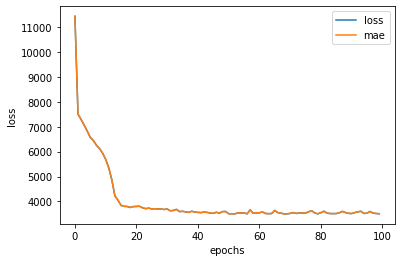

In [50]:
#hmm very better results than before. Apparently changing the learning rate improves the model results very good in this case.
#lets plot 
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");



### Pre Processing using Normalization and Standardization 

We will need the help of scikitlearn library once again



In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pandas
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [52]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder

# lets make a column transfer so we can make combine different preprocesing steps

ct = make_column_transformer(
    (MinMaxScaler(), ['age' , 'bmi' , 'children']),
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex' , 'smoker' , 'region'])
)

# create X ,y 
X = insurance.drop('charges' , axis =1 )
y = insurance['charges']

from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [57]:
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [58]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [67]:
#MAKE A MODEL

tf.random.set_seed(42) 
#build the model 
insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile

insurance_model3.compile(loss = tf.keras.losses.mae,
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics = ["mae"])
# Fit the model and Save history so we can plot it

modelhistory = insurance_model3.fit(X_train_normal , y_train , epochs = 200 , verbose = 0)


In [68]:
insurance_model3.evaluate(X_test_normal , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3175.4568 - mae: 3175.4568


[3175.456787109375, 3175.456787109375]

In [69]:
modelpreds = insurance_model3.predict(X_test_normal)
